#Importing libraries used


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [64]:
def compute_loss(y_true, y_pred):
    epsilon = 1e-15  # A small value to prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip the values to be between epsilon and 1 - epsilon
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [76]:

class LogisticRegression:
    def __init__(self, learning_rate=0.03, epochs=1000, num_features=10, batch_size=32):
        self.learning_rate = learning_rate
        self.num_iterations = epochs
        self.num_features = num_features
        self.batch_size = batch_size  # Added batch_size parameter
        self.weights = None
        self.bias = None

    def initialize_params(self, num_features):
        """Initialize weights and bias"""
        self.weights = np.random.randn(num_features) * 0.01  # Small random initialization
        self.bias = 0

    def fit_Gradient_Descent(self, X, y):
        num_samples, num_features = X.shape
        self.initialize_params(num_features)

        for i in range(self.num_iterations):
            # Calculate predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)
            loss = compute_loss(y, y_pred)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            print(f'Epoch {i+1}/{self.num_iterations}, Loss: {loss:.4f}')

    def fit_Batch_Gradient_Descent(self, X, y):
        num_samples, num_features = X.shape
        self.initialize_params(num_features)

        for i in range(self.num_iterations):
            # Calculate predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)
            loss = compute_loss(y, y_pred)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            print(f'Epoch {i+1}/{self.num_iterations}, Loss: {loss:.4f}')

    def fit_Stochastic_Gradient_Descent(self, X, y):
        num_samples, num_features = X.shape
        self.initialize_params(num_features)

        for i in range(self.num_iterations):
            for j in range(num_samples):
                X_i = X[j, :].reshape(1, -1)
                y_i = y[j]

                # Calculate prediction
                y_pred = sigmoid(np.dot(X_i, self.weights) + self.bias)

                # Calculate gradients
                dw = (y_pred - y_i) * X_i
                db = y_pred - y_i

                # Update weights and bias
                self.weights -= self.learning_rate * dw.flatten()
                self.bias -= self.learning_rate * db

            # Calculate loss for the entire dataset
            y_pred_full = self.predict(X)
            loss = compute_loss(y, y_pred_full)
            print(f'Epoch {i+1}/{self.num_iterations}, Loss: {loss:.4f}')

    def fit_Mini_Batch_Gradient_Descent(self, X, y):
        num_samples, num_features = X.shape
        self.initialize_params(num_features)

        for i in range(self.num_iterations):
            # Shuffle data
            indices = np.random.permutation(num_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Process data in mini-batches
            for j in range(0, num_samples, self.batch_size):
                X_batch = X_shuffled[j:j + self.batch_size]
                y_batch = y_shuffled[j:j + self.batch_size]

                # Compute predictions
                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_pred = sigmoid(linear_model)

                # Compute gradients
                dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
                db = (1 / self.batch_size) * np.sum(y_pred - y_batch)

                # Update weights
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            # Compute loss for the whole dataset
            y_pred_full = self.predict(X)
            loss = compute_loss(y, y_pred_full)
            print(f'Epoch {i+1}/{self.num_iterations}, Loss: {loss:.4f}')

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)

In [31]:
X, y = make_classification(n_samples=100, n_features=10, n_classes=2, n_informative=5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Training with gradient descent optimizer

In [46]:
LogisticRegression_gd = LogisticRegression(learning_rate=.01, epochs= 500)
LogisticRegression_gd.fit_Gradient_Descent(X_train, y_train)

Epoch 1/500, Loss: 0.6931
Epoch 2/500, Loss: 0.6886
Epoch 3/500, Loss: 0.6842
Epoch 4/500, Loss: 0.6800
Epoch 5/500, Loss: 0.6758
Epoch 6/500, Loss: 0.6718
Epoch 7/500, Loss: 0.6679
Epoch 8/500, Loss: 0.6641
Epoch 9/500, Loss: 0.6605
Epoch 10/500, Loss: 0.6569
Epoch 11/500, Loss: 0.6534
Epoch 12/500, Loss: 0.6501
Epoch 13/500, Loss: 0.6468
Epoch 14/500, Loss: 0.6436
Epoch 15/500, Loss: 0.6405
Epoch 16/500, Loss: 0.6374
Epoch 17/500, Loss: 0.6345
Epoch 18/500, Loss: 0.6316
Epoch 19/500, Loss: 0.6288
Epoch 20/500, Loss: 0.6261
Epoch 21/500, Loss: 0.6234
Epoch 22/500, Loss: 0.6208
Epoch 23/500, Loss: 0.6182
Epoch 24/500, Loss: 0.6158
Epoch 25/500, Loss: 0.6133
Epoch 26/500, Loss: 0.6109
Epoch 27/500, Loss: 0.6086
Epoch 28/500, Loss: 0.6063
Epoch 29/500, Loss: 0.6041
Epoch 30/500, Loss: 0.6019
Epoch 31/500, Loss: 0.5998
Epoch 32/500, Loss: 0.5977
Epoch 33/500, Loss: 0.5957
Epoch 34/500, Loss: 0.5937
Epoch 35/500, Loss: 0.5917
Epoch 36/500, Loss: 0.5898
Epoch 37/500, Loss: 0.5879
Epoch 38/5

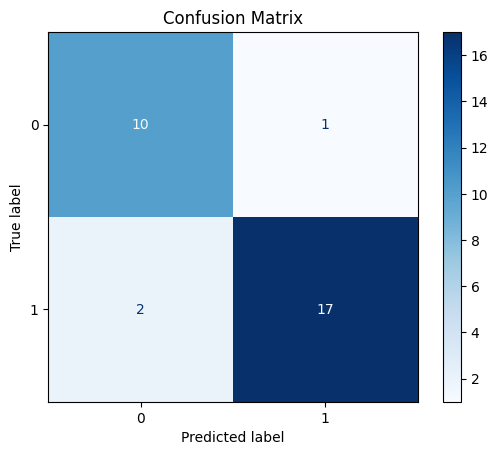

Accuracy:  0.9000
Precision: 0.9444
Recall:    0.8947
F1 Score:  0.9189


In [47]:
y_predict = LogisticRegression_gd.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


#Training with Batch Gradient descent

In [71]:
LogisticRegression_bgd = LogisticRegression(learning_rate=.01, epochs= 500)
LogisticRegression_bgd.fit_Batch_Gradient_Descent(X_train, y_train)

Epoch 1/500, Loss: 0.6931
Epoch 2/500, Loss: 0.6886
Epoch 3/500, Loss: 0.6842
Epoch 4/500, Loss: 0.6800
Epoch 5/500, Loss: 0.6758
Epoch 6/500, Loss: 0.6718
Epoch 7/500, Loss: 0.6679
Epoch 8/500, Loss: 0.6641
Epoch 9/500, Loss: 0.6605
Epoch 10/500, Loss: 0.6569
Epoch 11/500, Loss: 0.6534
Epoch 12/500, Loss: 0.6501
Epoch 13/500, Loss: 0.6468
Epoch 14/500, Loss: 0.6436
Epoch 15/500, Loss: 0.6405
Epoch 16/500, Loss: 0.6374
Epoch 17/500, Loss: 0.6345
Epoch 18/500, Loss: 0.6316
Epoch 19/500, Loss: 0.6288
Epoch 20/500, Loss: 0.6261
Epoch 21/500, Loss: 0.6234
Epoch 22/500, Loss: 0.6208
Epoch 23/500, Loss: 0.6182
Epoch 24/500, Loss: 0.6158
Epoch 25/500, Loss: 0.6133
Epoch 26/500, Loss: 0.6109
Epoch 27/500, Loss: 0.6086
Epoch 28/500, Loss: 0.6063
Epoch 29/500, Loss: 0.6041
Epoch 30/500, Loss: 0.6019
Epoch 31/500, Loss: 0.5998
Epoch 32/500, Loss: 0.5977
Epoch 33/500, Loss: 0.5957
Epoch 34/500, Loss: 0.5937
Epoch 35/500, Loss: 0.5917
Epoch 36/500, Loss: 0.5898
Epoch 37/500, Loss: 0.5879
Epoch 38/5

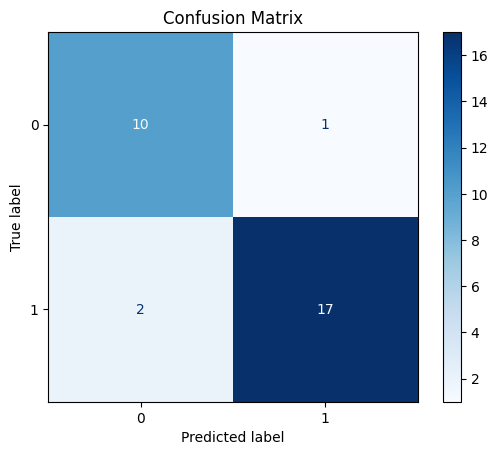

Accuracy:  0.9000
Precision: 0.9444
Recall:    0.8947
F1 Score:  0.9189


In [67]:
y_predict = LogisticRegression_bgd.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

#Training with Stochastic Gradient descent

In [77]:
LogisticRegression_sgd = LogisticRegression(learning_rate=.01, epochs= 1000)
LogisticRegression_sgd.fit_Stochastic_Gradient_Descent(X_train, y_train)

Epoch 1/1000, Loss: 7.4013
Epoch 2/1000, Loss: 4.9342
Epoch 3/1000, Loss: 4.4407
Epoch 4/1000, Loss: 3.4539
Epoch 5/1000, Loss: 3.9473
Epoch 6/1000, Loss: 3.4539
Epoch 7/1000, Loss: 3.4539
Epoch 8/1000, Loss: 3.4539
Epoch 9/1000, Loss: 3.4539
Epoch 10/1000, Loss: 3.4539
Epoch 11/1000, Loss: 3.4539
Epoch 12/1000, Loss: 3.4539
Epoch 13/1000, Loss: 3.4539
Epoch 14/1000, Loss: 3.4539
Epoch 15/1000, Loss: 3.4539
Epoch 16/1000, Loss: 3.4539
Epoch 17/1000, Loss: 3.4539
Epoch 18/1000, Loss: 3.4539
Epoch 19/1000, Loss: 3.4539
Epoch 20/1000, Loss: 3.4539
Epoch 21/1000, Loss: 3.4539
Epoch 22/1000, Loss: 2.9605
Epoch 23/1000, Loss: 2.9605
Epoch 24/1000, Loss: 2.9605
Epoch 25/1000, Loss: 2.9605
Epoch 26/1000, Loss: 2.9605
Epoch 27/1000, Loss: 2.9605
Epoch 28/1000, Loss: 2.9605
Epoch 29/1000, Loss: 2.9605
Epoch 30/1000, Loss: 2.9605
Epoch 31/1000, Loss: 2.9605
Epoch 32/1000, Loss: 2.9605
Epoch 33/1000, Loss: 2.9605
Epoch 34/1000, Loss: 2.9605
Epoch 35/1000, Loss: 2.9605
Epoch 36/1000, Loss: 2.9605
E

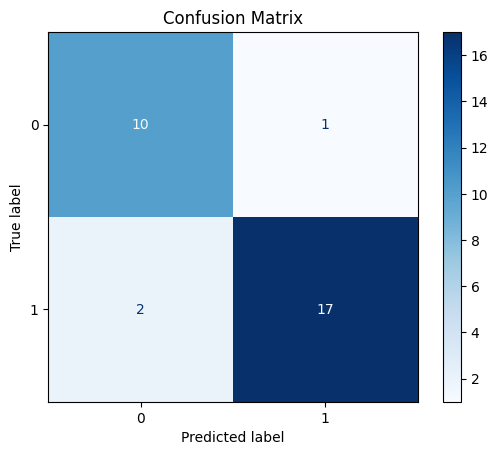

Accuracy:  0.9000
Precision: 0.9444
Recall:    0.8947
F1 Score:  0.9189


In [78]:
y_predict_sgd = LogisticRegression_sgd.predict(X_test)
cm = confusion_matrix(y_test, y_predict_sgd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_predict_sgd)
precision = precision_score(y_test, y_predict_sgd)
recall = recall_score(y_test, y_predict_sgd)
f1 = f1_score(y_test, y_predict_sgd)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

In [84]:
LogisticRegression_mbgd = LogisticRegression(learning_rate=.01, epochs= 1000)
LogisticRegression_mbgd.fit_Mini_Batch_Gradient_Descent(X_train, y_train)

Epoch 1/1000, Loss: 11.3487
Epoch 2/1000, Loss: 8.3881
Epoch 3/1000, Loss: 8.8815
Epoch 4/1000, Loss: 8.8815
Epoch 5/1000, Loss: 8.3881
Epoch 6/1000, Loss: 8.3881
Epoch 7/1000, Loss: 8.3881
Epoch 8/1000, Loss: 9.3749
Epoch 9/1000, Loss: 9.3749
Epoch 10/1000, Loss: 9.3749
Epoch 11/1000, Loss: 9.3749
Epoch 12/1000, Loss: 9.3749
Epoch 13/1000, Loss: 9.3749
Epoch 14/1000, Loss: 8.8815
Epoch 15/1000, Loss: 8.8815
Epoch 16/1000, Loss: 8.8815
Epoch 17/1000, Loss: 8.8815
Epoch 18/1000, Loss: 8.8815
Epoch 19/1000, Loss: 8.8815
Epoch 20/1000, Loss: 8.8815
Epoch 21/1000, Loss: 7.8947
Epoch 22/1000, Loss: 7.8947
Epoch 23/1000, Loss: 7.8947
Epoch 24/1000, Loss: 7.4012
Epoch 25/1000, Loss: 7.4012
Epoch 26/1000, Loss: 7.4012
Epoch 27/1000, Loss: 7.4012
Epoch 28/1000, Loss: 6.9078
Epoch 29/1000, Loss: 6.4144
Epoch 30/1000, Loss: 6.4144
Epoch 31/1000, Loss: 6.4144
Epoch 32/1000, Loss: 6.4144
Epoch 33/1000, Loss: 6.4144
Epoch 34/1000, Loss: 6.4144
Epoch 35/1000, Loss: 6.4144
Epoch 36/1000, Loss: 6.4144


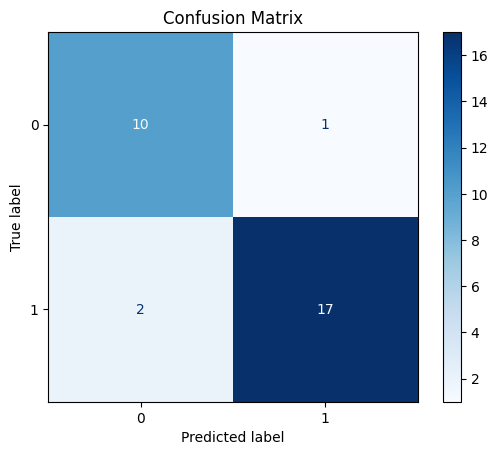

Accuracy:  0.9000
Precision: 0.9444
Recall:    0.8947
F1 Score:  0.9189


In [85]:
y_predict_mbgd = LogisticRegression_mbgd.predict(X_test)
cm = confusion_matrix(y_test, y_predict_sgd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_predict_sgd)
precision = precision_score(y_test, y_predict_sgd)
recall = recall_score(y_test, y_predict_sgd)
f1 = f1_score(y_test, y_predict_sgd)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")